In \[1\]:

    # Import necessary Python libraries.

    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns

In \[2\]:

    # Create the data frame.

    dataframe = pd.read_csv("Zomato_data.csv")
    print(dataframe.head())

       Unnamed: 0                                                url  \
    0           1  https://www.zomato.com/bangalore/spice-elephan...   
    1           2  https://www.zomato.com/SanchurroBangalore?cont...   
    2           3  https://www.zomato.com/bangalore/addhuri-udupi...   
    3           4  https://www.zomato.com/bangalore/grand-village...   
    4           5  https://www.zomato.com/bangalore/timepass-dinn...   

                                                 address                   name  \
    0  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
    1  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
    2  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
    3  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   
    4  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...        Timepass Dinner   

      online_order book_table   rate  votes                           phone  \
    0          Yes         No  4.1/5    787                    080 41714161   
    1          Yes         No  3.8/5    918                  +91 9663487993   
    2           No         No  3.7/5     88                  +91 9620009302   
    3           No         No  3.8/5    166  +91 8026612447\n+91 9901210005   
    4          Yes         No  3.8/5    286  +91 9980040002\n+91 9980063005   

           location            rest_type  \
    0  Banashankari        Casual Dining   
    1  Banashankari  Cafe, Casual Dining   
    2  Banashankari          Quick Bites   
    3  Basavanagudi        Casual Dining   
    4  Basavanagudi        Casual Dining   

                                              dish_liked  \
    0  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
    1  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
    2                                        Masala Dosa   
    3                                Panipuri, Gol Gappe   
    4  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   

                          cuisines  approx_cost(for two people)  \
    0  Chinese, North Indian, Thai                          800   
    1       Cafe, Mexican, Italian                          800   
    2   South Indian, North Indian                          300   
    3     North Indian, Rajasthani                          600   
    4                 North Indian                          600   

                                            reviews_list menu_item  \
    0  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
    1  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
    2  [('Rated 4.0', "RATED\n  Great food and proper...        []   
    3  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
    4  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   

      listed_in(type) listed_in(city)  
    0          Buffet    Banashankari  
    1          Buffet    Banashankari  
    2          Buffet    Banashankari  
    3          Buffet    Banashankari  
    4          Buffet    Banashankari  

In \[5\]:

    # Before proceeding, let’s convert the data type of the “rate” column to float and remove the denominator.

    def handleRate(value):
        value=str(value).split('/')
        value=value[0];
        return float(value)

    dataframe['rate']=dataframe['rate'].apply(handleRate)

In \[6\]:

    print(dataframe.head())

       Unnamed: 0                                                url  \
    0           1  https://www.zomato.com/bangalore/spice-elephan...   
    1           2  https://www.zomato.com/SanchurroBangalore?cont...   
    2           3  https://www.zomato.com/bangalore/addhuri-udupi...   
    3           4  https://www.zomato.com/bangalore/grand-village...   
    4           5  https://www.zomato.com/bangalore/timepass-dinn...   

                                                 address                   name  \
    0  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...         Spice Elephant   
    1  1112, Next to KIMS Medical College, 17th Cross...        San Churro Cafe   
    2  1st Floor, Annakuteera, 3rd Stage, Banashankar...  Addhuri Udupi Bhojana   
    3  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...          Grand Village   
    4  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...        Timepass Dinner   

      online_order book_table  rate  votes                           phone  \
    0          Yes         No   4.1    787                    080 41714161   
    1          Yes         No   3.8    918                  +91 9663487993   
    2           No         No   3.7     88                  +91 9620009302   
    3           No         No   3.8    166  +91 8026612447\n+91 9901210005   
    4          Yes         No   3.8    286  +91 9980040002\n+91 9980063005   

           location            rest_type  \
    0  Banashankari        Casual Dining   
    1  Banashankari  Cafe, Casual Dining   
    2  Banashankari          Quick Bites   
    3  Basavanagudi        Casual Dining   
    4  Basavanagudi        Casual Dining   

                                              dish_liked  \
    0  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
    1  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
    2                                        Masala Dosa   
    3                                Panipuri, Gol Gappe   
    4  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   

                          cuisines  approx_cost(for two people)  \
    0  Chinese, North Indian, Thai                          800   
    1       Cafe, Mexican, Italian                          800   
    2   South Indian, North Indian                          300   
    3     North Indian, Rajasthani                          600   
    4                 North Indian                          600   

                                            reviews_list menu_item  \
    0  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
    1  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
    2  [('Rated 4.0', "RATED\n  Great food and proper...        []   
    3  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
    4  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   

      listed_in(type) listed_in(city)  
    0          Buffet    Banashankari  
    1          Buffet    Banashankari  
    2          Buffet    Banashankari  
    3          Buffet    Banashankari  
    4          Buffet    Banashankari  

In \[7\]:

    dataframe.info()

    <class 'pandas.core.frame.DataFrame'>
    RangeIndex: 9 entries, 0 to 8
    Data columns (total 18 columns):
     #   Column                       Non-Null Count  Dtype  
    ---  ------                       --------------  -----  
     0   Unnamed: 0                   9 non-null      int64  
     1   url                          9 non-null      object 
     2   address                      9 non-null      object 
     3   name                         9 non-null      object 
     4   online_order                 9 non-null      object 
     5   book_table                   9 non-null      object 
     6   rate                         9 non-null      float64
     7   votes                        9 non-null      int64  
     8   phone                        9 non-null      object 
     9   location                     9 non-null      object 
     10  rest_type                    9 non-null      object 
     11  dish_liked                   8 non-null      object 
     12  cuisines                     9 non-null      object 
     13  approx_cost(for two people)  9 non-null      int64  
     14  reviews_list                 9 non-null      object 
     15  menu_item                    9 non-null      object 
     16  listed_in(type)              9 non-null      object 
     17  listed_in(city)              9 non-null      object 
    dtypes: float64(1), int64(3), object(14)
    memory usage: 1.4+ KB

In \[8\]:

    dataframe.describe

Out\[8\]:

    <bound method NDFrame.describe of    Unnamed: 0                                                url  \
    0           1  https://www.zomato.com/bangalore/spice-elephan...   
    1           2  https://www.zomato.com/SanchurroBangalore?cont...   
    2           3  https://www.zomato.com/bangalore/addhuri-udupi...   
    3           4  https://www.zomato.com/bangalore/grand-village...   
    4           5  https://www.zomato.com/bangalore/timepass-dinn...   
    5           6  https://www.zomato.com/bangalore/rosewood-inte...   
    6           7  https://www.zomato.com/bangalore/onesta-banash...   
    7           8  https://www.zomato.com/bangalore/penthouse-caf...   
    8           9  https://www.zomato.com/bangalore/smacznego-ban...   

                                                 address  \
    0  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
    1  1112, Next to KIMS Medical College, 17th Cross...   
    2  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
    3  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
    4  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
    5  19/1, New Timberyard Layout, Beside Satellite ...   
    6  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
    7  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
    8  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                                  name online_order book_table  \
    0                                   Spice Elephant          Yes         No   
    1                                  San Churro Cafe          Yes         No   
    2                            Addhuri Udupi Bhojana           No         No   
    3                                    Grand Village           No         No   
    4                                  Timepass Dinner          Yes         No   
    5  Rosewood International Hotel - Bar & Restaurant           No         No   
    6                                           Onesta          Yes        Yes   
    7                                   Penthouse Cafe          Yes         No   
    8                                        Smacznego          Yes         No   

       rate  votes                           phone      location  \
    0   4.1    787                    080 41714161  Banashankari   
    1   3.8    918                  +91 9663487993  Banashankari   
    2   3.7     88                  +91 9620009302  Banashankari   
    3   3.8    166  +91 8026612447\n+91 9901210005  Basavanagudi   
    4   3.8    286  +91 9980040002\n+91 9980063005  Basavanagudi   
    5   3.6      8    +91 9731716688\n080 26740366   Mysore Road   
    6   4.6   2556      080 48653961\n080 48655715  Banashankari   
    7   4.0    324  +91 8884135549\n+91 9449449316  Banashankari   
    8   4.2    504  +91 9945230807\n+91 9743804471  Banashankari   

                 rest_type                                         dish_liked  \
    0        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
    1  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
    2          Quick Bites                                        Masala Dosa   
    3        Casual Dining                                Panipuri, Gol Gappe   
    4        Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
    5        Casual Dining                                                NaN   
    6  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
    7                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
    8                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                          cuisines  approx_cost(for two people)  \
    0                  Chinese, North Indian, Thai                          800   
    1                       Cafe, Mexican, Italian                          800   
    2                   South Indian, North Indian                          300   
    3                     North Indian, Rajasthani                          600   
    4                                 North Indian                          600   
    5  North Indian, South Indian, Andhra, Chinese                          800   
    6                         Pizza, Cafe, Italian                          600   
    7                   Cafe, Italian, Continental                          700   
    8     Cafe, Mexican, Italian, Momos, Beverages                          550   

                                            reviews_list menu_item  \
    0  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
    1  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
    2  [('Rated 4.0', "RATED\n  Great food and proper...        []   
    3  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
    4  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
    5  [('Rated 5.0', 'RATED\n  Awesome food ??Great ...        []   
    6  [('Rated 5.0', 'RATED\n  I personally really l...        []   
    7  [('Rated 3.0', "RATED\n  I had been to this pl...        []   
    8  [('Rated 4.0', "RATED\n  Easy to locate\nVFM 3...        []   

      listed_in(type) listed_in(city)  
    0          Buffet    Banashankari  
    1          Buffet    Banashankari  
    2          Buffet    Banashankari  
    3          Buffet    Banashankari  
    4          Buffet    Banashankari  
    5          Buffet    Banashankari  
    6           Cafes    Banashankari  
    7           Cafes    Banashankari  
    8           Cafes    Banashankari  >

In \[11\]:

    dataframe.tail

Out\[11\]:

    <bound method NDFrame.tail of    Unnamed: 0                                                url  \
    0           1  https://www.zomato.com/bangalore/spice-elephan...   
    1           2  https://www.zomato.com/SanchurroBangalore?cont...   
    2           3  https://www.zomato.com/bangalore/addhuri-udupi...   
    3           4  https://www.zomato.com/bangalore/grand-village...   
    4           5  https://www.zomato.com/bangalore/timepass-dinn...   
    5           6  https://www.zomato.com/bangalore/rosewood-inte...   
    6           7  https://www.zomato.com/bangalore/onesta-banash...   
    7           8  https://www.zomato.com/bangalore/penthouse-caf...   
    8           9  https://www.zomato.com/bangalore/smacznego-ban...   

                                                 address  \
    0  2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...   
    1  1112, Next to KIMS Medical College, 17th Cross...   
    2  1st Floor, Annakuteera, 3rd Stage, Banashankar...   
    3  10, 3rd Floor, Lakshmi Associates, Gandhi Baza...   
    4  37, 5-1, 4th Floor, Bosco Court, Gandhi Bazaar...   
    5  19/1, New Timberyard Layout, Beside Satellite ...   
    6  2469, 3rd Floor, 24th Cross, Opposite BDA Comp...   
    7  1, 30th Main Road, 3rd Stage, Banashankari, Ba...   
    8  2470, 21 Main Road, 25th Cross, Banashankari, ...   

                                                  name online_order book_table  \
    0                                   Spice Elephant          Yes         No   
    1                                  San Churro Cafe          Yes         No   
    2                            Addhuri Udupi Bhojana           No         No   
    3                                    Grand Village           No         No   
    4                                  Timepass Dinner          Yes         No   
    5  Rosewood International Hotel - Bar & Restaurant           No         No   
    6                                           Onesta          Yes        Yes   
    7                                   Penthouse Cafe          Yes         No   
    8                                        Smacznego          Yes         No   

       rate  votes                           phone      location  \
    0   4.1    787                    080 41714161  Banashankari   
    1   3.8    918                  +91 9663487993  Banashankari   
    2   3.7     88                  +91 9620009302  Banashankari   
    3   3.8    166  +91 8026612447\n+91 9901210005  Basavanagudi   
    4   3.8    286  +91 9980040002\n+91 9980063005  Basavanagudi   
    5   3.6      8    +91 9731716688\n080 26740366   Mysore Road   
    6   4.6   2556      080 48653961\n080 48655715  Banashankari   
    7   4.0    324  +91 8884135549\n+91 9449449316  Banashankari   
    8   4.2    504  +91 9945230807\n+91 9743804471  Banashankari   

                 rest_type                                         dish_liked  \
    0        Casual Dining  Momos, Lunch Buffet, Chocolate Nirvana, Thai G...   
    1  Cafe, Casual Dining  Churros, Cannelloni, Minestrone Soup, Hot Choc...   
    2          Quick Bites                                        Masala Dosa   
    3        Casual Dining                                Panipuri, Gol Gappe   
    4        Casual Dining  Onion Rings, Pasta, Kadhai Paneer, Salads, Sal...   
    5        Casual Dining                                                NaN   
    6  Casual Dining, Cafe  Farmhouse Pizza, Chocolate Banana, Virgin Moji...   
    7                 Cafe  Pizza, Mocktails, Coffee, Nachos, Salad, Pasta...   
    8                 Cafe  Waffles, Pasta, Coleslaw Sandwich, Choco Waffl...   

                                          cuisines  approx_cost(for two people)  \
    0                  Chinese, North Indian, Thai                          800   
    1                       Cafe, Mexican, Italian                          800   
    2                   South Indian, North Indian                          300   
    3                     North Indian, Rajasthani                          600   
    4                                 North Indian                          600   
    5  North Indian, South Indian, Andhra, Chinese                          800   
    6                         Pizza, Cafe, Italian                          600   
    7                   Cafe, Italian, Continental                          700   
    8     Cafe, Mexican, Italian, Momos, Beverages                          550   

                                            reviews_list menu_item  \
    0  [('Rated 4.0', 'RATED\n  Had been here for din...        []   
    1  [('Rated 3.0', "RATED\n  Ambience is not that ...        []   
    2  [('Rated 4.0', "RATED\n  Great food and proper...        []   
    3  [('Rated 4.0', 'RATED\n  Very good restaurant ...        []   
    4  [('Rated 3.0', 'RATED\n  Food 3/5\nAmbience 3/...        []   
    5  [('Rated 5.0', 'RATED\n  Awesome food ??Great ...        []   
    6  [('Rated 5.0', 'RATED\n  I personally really l...        []   
    7  [('Rated 3.0', "RATED\n  I had been to this pl...        []   
    8  [('Rated 4.0', "RATED\n  Easy to locate\nVFM 3...        []   

      listed_in(type) listed_in(city)  
    0          Buffet    Banashankari  
    1          Buffet    Banashankari  
    2          Buffet    Banashankari  
    3          Buffet    Banashankari  
    4          Buffet    Banashankari  
    5          Buffet    Banashankari  
    6           Cafes    Banashankari  
    7           Cafes    Banashankari  
    8           Cafes    Banashankari  >

In \[9\]:

    dataframe.shape

Out\[9\]:

    (9, 18)

In \[10\]:

    dataframe.size

Out\[10\]:

    162

In \[12\]:

    dataframe.columns

Out\[12\]:

    Index(['Unnamed: 0', 'url', 'address', 'name', 'online_order', 'book_table',
           'rate', 'votes', 'phone', 'location', 'rest_type', 'dish_liked',
           'cuisines', 'approx_cost(for two people)', 'reviews_list', 'menu_item',
           'listed_in(type)', 'listed_in(city)'],
          dtype='object')

In \[13\]:

    dataframe.isnull()

Out\[13\]:

|     | Unnamed: 0 | url   | address | name  | online_order | book_table | rate  | votes | phone | location | rest_type | dish_liked | cuisines | approx_cost(for two people) | reviews_list | menu_item | listed_in(type) | listed_in(city) |
|-----|------------|-------|---------|-------|--------------|------------|-------|-------|-------|----------|-----------|------------|----------|-----------------------------|--------------|-----------|-----------------|-----------------|
| 0   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 1   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 2   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 3   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 4   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 5   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | True       | False    | False                       | False        | False     | False           | False           |
| 6   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 7   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |
| 8   | False      | False | False   | False | False        | False      | False | False | False | False    | False     | False      | False    | False                       | False        | False     | False           | False           |

In \[14\]:

    # Let’s explore the listed_in (type) column.

    sns.countplot(x=dataframe['listed_in(type)'])
    plt.xlabel("Type of restaurant")

    # Conclusion: The majority of the restaurants fall into the buffet category.

Out\[14\]:

    Text(0.5, 0, 'Type of restaurant')

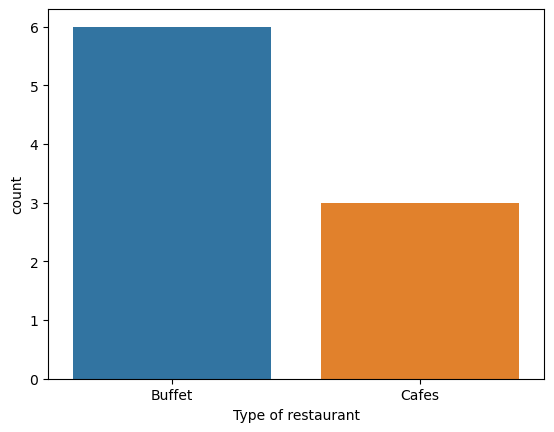

In \[15\]:

    grouped_data = dataframe.groupby('listed_in(type)')['votes'].sum()
    result = pd.DataFrame({'votes': grouped_data})
    plt.plot(result, c="green", marker="o")
    plt.xlabel("Type of restaurant", c="red", size=20)
    plt.ylabel("Votes", c="red", size=20)

Out\[15\]:

    Text(0, 0.5, 'Votes')

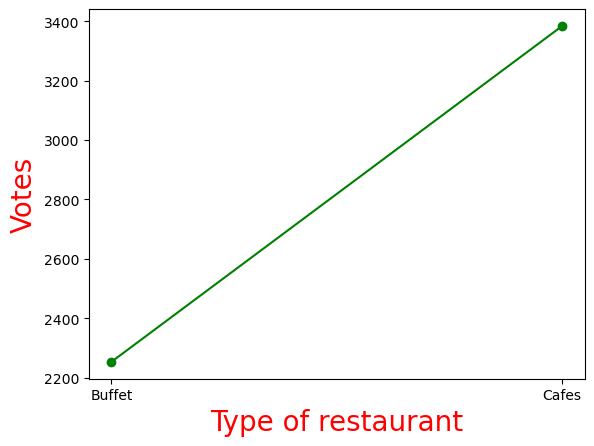

In \[16\]:

    # Now we will determine the restaurant’s name that received the maximum votes based on a given dataframe.

    max_votes = dataframe['votes'].max()
    restaurant_with_max_votes = dataframe.loc[dataframe['votes'] == max_votes, 'name']

    print("Restaurant(s) with the maximum votes:")
    print(restaurant_with_max_votes)

    Restaurant(s) with the maximum votes:
    6    Onesta
    Name: name, dtype: object

In \[17\]:

    max_votes

Out\[17\]:

    2556

In \[20\]:

    # Let’s explore the online_order column.

    sns.countplot(x=dataframe['online_order'])

Out\[20\]:

    <Axes: xlabel='online_order', ylabel='count'>

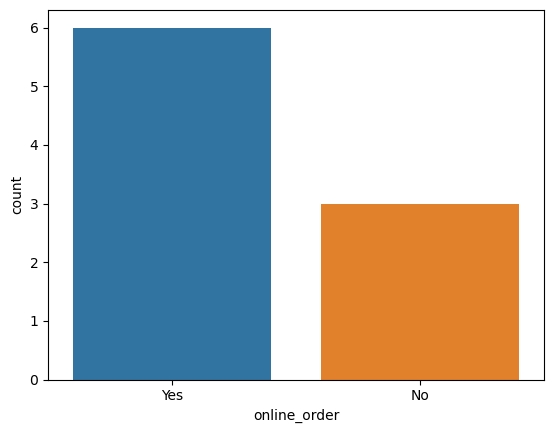

In \[21\]:

    # Let’s explore the rate column.

    plt.hist(dataframe['rate'],bins=5)
    plt.title("Ratings Distribution")
    plt.show()

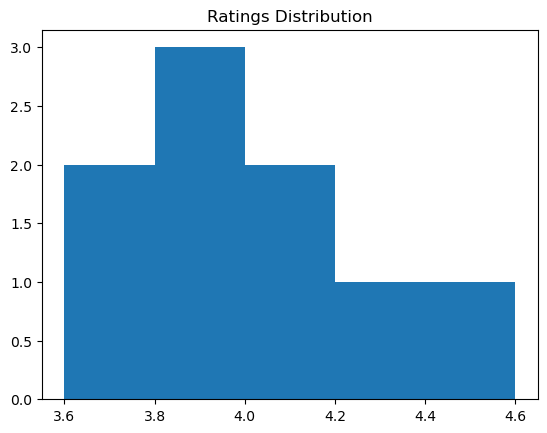

In \[22\]:

    # Let’s explore the approx_cost(for two people) column.

    couple_data=dataframe['approx_cost(for two people)']
    sns.countplot(x=couple_data)

Out\[22\]:

    <Axes: xlabel='approx_cost(for two people)', ylabel='count'>

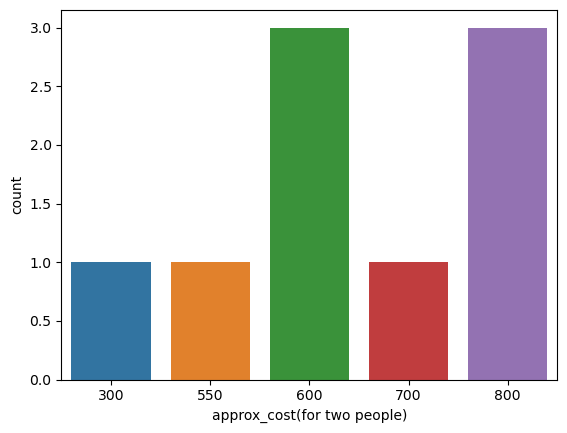

In \[23\]:

    # Now we will examine whether online orders receive higher ratings than offline orders.

    plt.figure(figsize = (6,6))
    sns.boxplot(x = 'online_order', y = 'rate', data = dataframe)

Out\[23\]:

    <Axes: xlabel='online_order', ylabel='rate'>

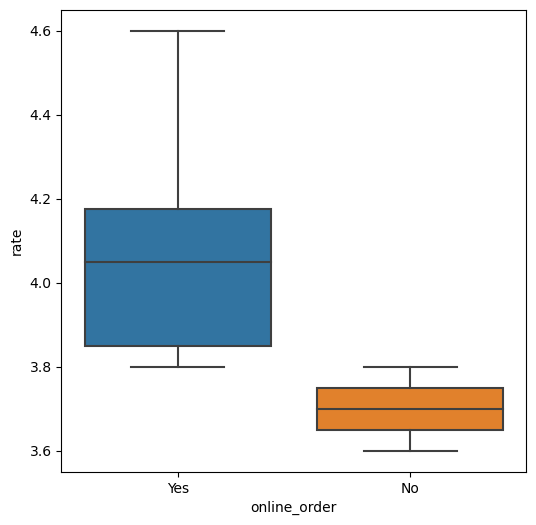

In \[24\]:

    pivot_table = dataframe.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
    sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
    plt.title("Heatmap")
    plt.xlabel("Online Order")
    plt.ylabel("Listed In (Type)")
    plt.show()

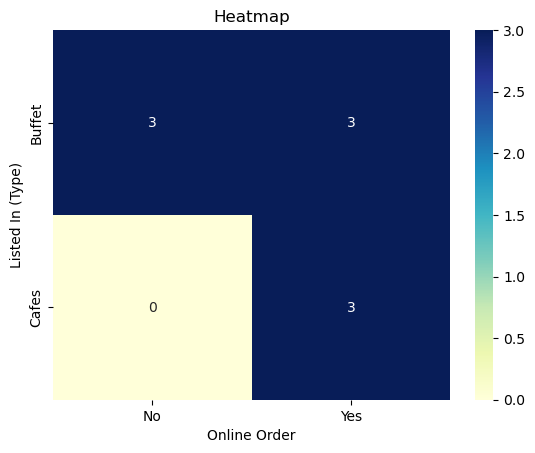

In \[ \]:

     

In \[ \]:

     

In \[ \]: